
# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



I have chosen to analyze the movies dataset. it contains 5000 movies (row) and 20 columns that describe the title of the movie, the genres,the language, the budged, the revenue, the movie popularity and so on. I wanted to explore the revenue of this movies. what are the to 10 movies by profit? is there is a correlation between the budget and revenue? and wether high score means high revenue.

First I imported the packages that I will need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



Then here I tried to understand the data and its structure more .

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df.shape

(4803, 20)

In [4]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Here I wanted to see if ther is any missing data in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 


### Data Cleaning

Even though there are a few null values in the dataset, I will not need these columns in my invistigation. So I will drop the culumns that are not necssary for my invistigation. 

In [6]:
df.drop(['homepage','id','keywords','overview','original_language','popularity','production_companies','production_countries', 'spoken_languages','status','tagline', 'release_date', 'genres','runtime', 'vote_count'], axis=1, inplace=True)
df.head()

,budget,original_title,revenue,title,vote_average
0,237000000,Avatar,2787965087,Avatar,7.2
1,300000000,Pirates of the Caribbean: At World's End,961000000,Pirates of the Caribbean: At World's End,6.9
2,245000000,Spectre,880674609,Spectre,6.3
3,250000000,The Dark Knight Rises,1084939099,The Dark Knight Rises,7.6
4,260000000,John Carter,284139100,John Carter,6.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
budget            4803 non-null int64
original_title    4803 non-null object
revenue           4803 non-null int64
title             4803 non-null object
vote_average      4803 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 187.7+ KB


Now I do not have any missing data for my invistigation. 

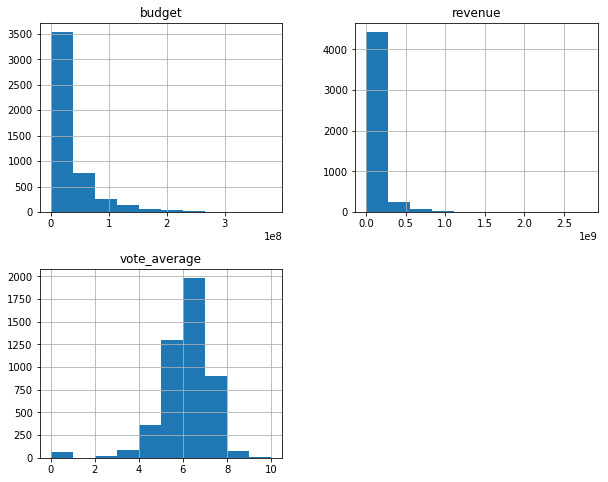

In [8]:
df.hist(figsize=(10,8));

Here I explored the visualisation for each column. There are so many zero values in revenue and budget so I will drop all the rows with zero values. 

In [9]:
df = df[df.loc[:]!=0].dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 0 to 4798
Data columns (total 5 columns):
budget            3227 non-null float64
original_title    3227 non-null object
revenue           3227 non-null float64
title             3227 non-null object
vote_average      3227 non-null float64
dtypes: float64(3), object(2)
memory usage: 151.3+ KB


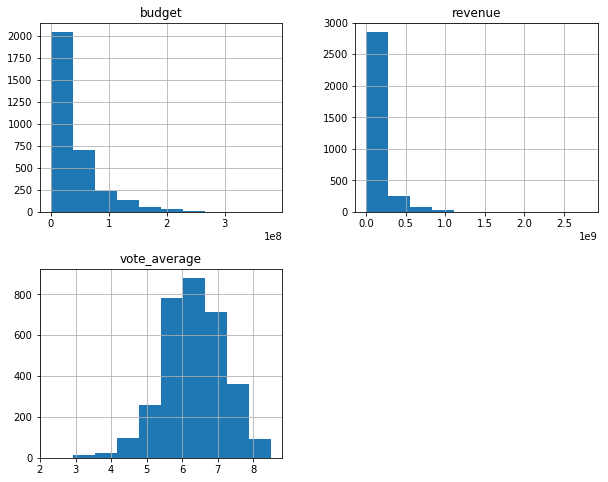

In [10]:
df.hist(figsize=(10,8));

# <a id='eda'></a>
## Exploratory Data Analysis



### Q1 : What are the top 10 movies by profit?

In [15]:
highest_profit = df.sort_values('revenue', ascending = False)
high = highest_profit.loc[:,['title', 'revenue']]
high.head(10)

,title,revenue
0,Avatar,2.787965e+09
25,Titanic,1.845034e+09
16,The Avengers,1.519558e+09
28,Jurassic World,1.513529e+09
44,Furious 7,1.506249e+09
7,Avengers: Age of Ultron,1.405404e+09
124,Frozen,1.274219e+09
31,Iron Man 3,1.215440e+09
546,Minions,1.156731e+09
26,Captain America: Civil War,1.153304e+09


For the first question, I wanted to explore the top ten movies by profit. To do this, I sorted the values of revenue in descending order and then I filterd the top 10. we can see that Avatar  is the highest (2 billion and 787 million) with a significant difference from other movies. Then comes Titanic movie which has a revenue of 1 billion and 845 miilion. 

## Q2 :The correlation between budget and revenue

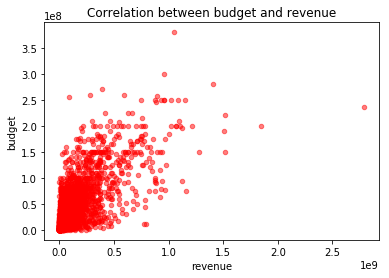

In [12]:
df.plot(x='revenue', y='budget', kind='scatter', color='red', alpha=0.5)
plt.title('Correlation between budget and revenue');

I also wanted to see if there is a relationship between budget and revenue. Does spending high budget means high revenue? I did a scatter plot to explore the correlation. The scatter plot shows that there is a weak positive correlation between the two variables.

## Q3: The correlation between vote score and revenue

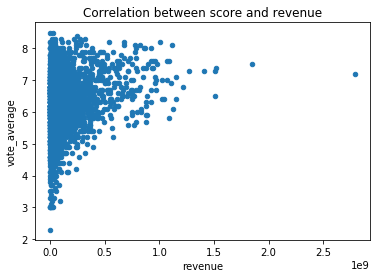

In [13]:
df.plot(x='revenue', y='vote_average', kind='scatter')
plt.title('Correlation between score and revenue');

I used the same method from the previous question. the result shows no correlation between high score and high revenue. Some movies get high score even though the revenue is not high. 

# <a id='conclusions'></a>
## Conclusions


To sum up, I did this simple invistigation on movies dataset. I focused mostly on the revenue variable. First, I wanted to explore the top 10 movies by profit. Clearly, Avatar movie comes at first with a very high revenue. Second, I did a plot to invistigate the correlation between budget and revenue. The scatter plot shows that there is weak positive correlation. Finally, I used scatter plot as well to see if there is a relationship between revenue and score. does high score means that the movie gains high profit? However, the plot shows no correlation.

### Limitation


In doing this analysis I have met some barriers. Especially in the revenue and budget columns. Some of the movies does not have a high revenue or budget while Some movies are significantly high. To elaborate, Some movies has a revenue of billions while others 100 million and less. So I have a very wide range which makes it hard to invistigate and plot

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0